**Advanced Deep Learning 2023**

**Exercise 4**

**Juuso Paakkunainen 70579167**

Implement Batch Normalization with your own CNN model in Exercise 1 on MNIST dataset, compare the
differences between with Batch Normalization and without Batch Normalization, display the classification
error (%) by epoch.


Note:
1. MNIST database link: http://yann.lecun.com/exdb/mnist/, in MNIST dataset 60000 images for
training and 10000 images for testing

In [ ]:
# Imports

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
learning_rate = 0.001
momentum = 0.95

In [ ]:
def elu(x, alpha=1.0):
    return tf.where(x > 0, x, alpha * (tf.exp(x) - 1))

In [ ]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label


Loading the MNIST dataset and normalizing the pictures

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


Building the CNN model with Batch Normalization

In [ ]:
def build_model(activation_function, optimizer, batch_normalization):
    if batch_normalization == True:
      model = Sequential([
          layers.Reshape((28, 28, 1), input_shape=(28, 28)),
          layers.Conv2D(32, (3, 3), activation=activation_function),
          layers.BatchNormalization(),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(64, (3, 3), activation=activation_function),
          layers.BatchNormalization(),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(64, (3, 3), activation=activation_function),
          layers.BatchNormalization(),
          layers.Flatten(),
          layers.Dense(64, activation=activation_function),
          layers.BatchNormalization(),
          layers.Dense(10)
      ])
    else:
      model = Sequential([
        layers.Reshape((28, 28, 1), input_shape=(28, 28)),
        layers.Conv2D(32, (3, 3), activation=activation_function),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.Flatten(),
        layers.Dense(64, activation=activation_function),
        layers.Dense(10)
    ])
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title + ' - Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

    train_error = [1 - acc for acc in history.history['accuracy']]
    val_error = [1 - acc for acc in history.history['val_accuracy']]

    plt.plot(train_error, label='Training Error')
    plt.plot(val_error, label='Validation Error')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy / Error')
    plt.title(title + ' - Accuracy and Error')
    plt.legend()

    plt.show()

Training the model on the MNIST dataset WITH batch normalization



Epoch 1/6
1875/1875 [==============================] - 13s 5ms/step - loss: 0.1037 - accuracy: 0.9682 - val_loss: 0.0438 - val_accuracy: 0.9858
Epoch 2/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0439 - accuracy: 0.9864 - val_loss: 0.0327 - val_accuracy: 0.9895
Epoch 3/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0322 - accuracy: 0.9899 - val_loss: 0.0320 - val_accuracy: 0.9898
Epoch 4/6
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0257 - accuracy: 0.9920 - val_loss: 0.0368 - val_accuracy: 0.9877
Epoch 5/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0308 - val_accuracy: 0.9895
Epoch 6/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0296 - val_accuracy: 0.9911


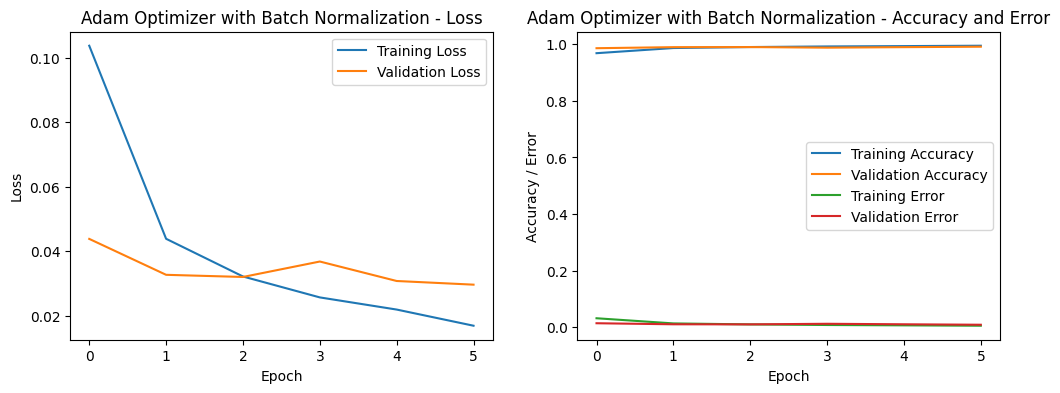

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=momentum)
model = build_model(activation_function='elu', optimizer=adam, batch_normalization=True)
history = model.fit(x_train, y_train, epochs=6, validation_data=(x_test, y_test))

title = f'Adam Optimizer with Batch Normalization'
plot_history(history, title=title)

Training the model on the MNIST dataset WITHOUT batch normalization



Epoch 1/6
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1339 - accuracy: 0.9598 - val_loss: 0.0628 - val_accuracy: 0.9781
Epoch 2/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0521 - accuracy: 0.9844 - val_loss: 0.0367 - val_accuracy: 0.9884
Epoch 3/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.0363 - val_accuracy: 0.9903
Epoch 4/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0419 - val_accuracy: 0.9877
Epoch 5/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.0523 - val_accuracy: 0.9859
Epoch 6/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.0415 - val_accuracy: 0.9886


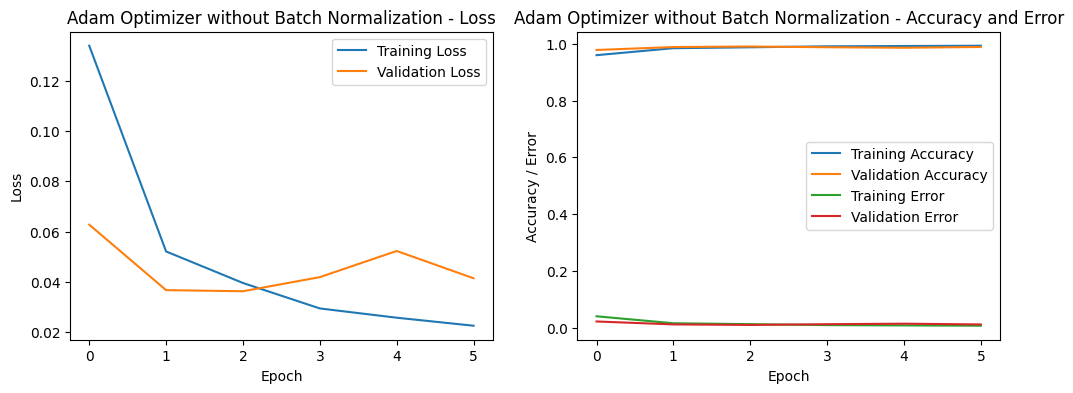

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=momentum)
model = build_model(activation_function='elu', optimizer=adam, batch_normalization=False)
history = model.fit(x_train, y_train, epochs=6, validation_data=(x_test, y_test))

title = f'Adam Optimizer without Batch Normalization'
plot_history(history, title=title)